In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

Mounted at /content/gdrive


In [2]:
!pip install import-ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!cp /content/gdrive/MyDrive/Recession_Predictor_Project/Exploratory_Data_Analysis.ipynb /content

importing Jupyter notebook from Exploratory_Data_Analysis.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from Data_Cleaning.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from DataCollection.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Data_Cleaning.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Data_Cleaning.ipynb:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Data_Cleaning.ipynb:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Data_Cleaning.ipynb:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Inflation/CPI
               Recession_US
Inflation/CPI              
216.995                 1.0
212.705                 1.0
213.022                 1.0
213.448                 1.0
213.942                 1.0
...                     ...
176.000                 0.0
175.600                 0.0
174.600                 0.0
174.200                 0.0
291.474                 0.0

[373 rows x 1 columns]
UNRATE
        Recession_US
UNRATE              
14.7        1.000000
8.7         1.000000
6.8         0.400000
3.5         0.333333
8.3         0.333333
...              ...
7.4         0.000000
7.5         0.000000
7.6         0.000000
7.7         0.000000
7.0         0.000000

[67 rows x 1 columns]
FEDFUNDS
          Recession_US
FEDFUNDS              
3.94               1.0
0.97               1.0
1.58               1.0
6.25               1.0
1.81               1.0
...                ...
2.39               0.0
2.40               0.0
2.41               0.0
2.42               0.0
8.29      

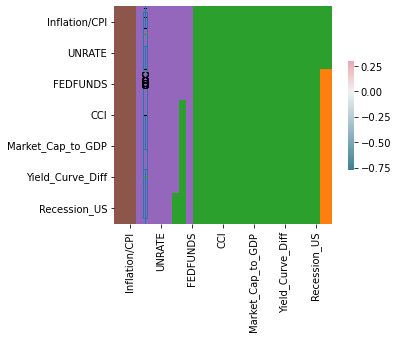

In [4]:
import Exploratory_Data_Analysis
df = Exploratory_Data_Analysis.df

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [6]:
df.columns

Index(['Year', 'Month', 'Inflation/CPI', 'UNRATE', 'FEDFUNDS', 'CCI',
       'Market_Cap_to_GDP', 'Yield_Curve_Diff', 'Recession_US'],
      dtype='object')

In [7]:
df_model = df[['Recession_US','Inflation/CPI','UNRATE','FEDFUNDS','CCI','Market_Cap_to_GDP','Yield_Curve_Diff']]

In [8]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [9]:
df_dum

,Recession_US,Inflation/CPI,UNRATE,FEDFUNDS,CCI,Market_Cap_to_GDP,Yield_Curve_Diff
0,0,127.500,5.4,8.23,100.63,0.384150,-0.308571
1,0,128.000,5.3,8.24,100.61,0.384150,-0.471053
2,0,128.600,5.2,8.28,100.68,0.384150,-0.418636
3,0,128.900,5.4,8.26,100.74,0.392923,-0.745000
4,0,129.100,5.4,8.18,100.60,0.392923,-0.751364
...,...,...,...,...,...,...,...
384,0,281.933,4.0,0.08,97.46,2.371155,-1.618500
385,0,284.182,3.8,0.08,97.13,2.371155,-1.619474
386,0,287.708,3.6,0.20,96.91,2.371155,-1.680435
387,0,288.663,3.6,0.33,96.84,2.371155,-1.984000


In [10]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('Recession_US', axis =1)
y = df_dum.Recession_US.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     22.04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           2.77e-22
Time:                        12:17:21   Log-Likelihood:                -30.613
No. Observations:                 389   AIC:                             75.23
Df Residuals:                     382   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8910      1.594      8.086      0.000       9.757      16.025
Inflation/CPI         0.0006      0.001      0.463      0.643      -0.002       0.003
UNRATE               -0.0558      0.013     -4.340      0.000      -0.081      -0.031
FEDFUNDS              0.0203      0.022      0.923      0.357      -0.023       0.064
CCI                  -0.1248      0.014     -9.204      0.000      -0.151      -0.098
Market_Cap_to_GDP    -0.1353      0.063     -2.154      0.032      -0.259      -0.012
Yield_Curve_Diff      0.0131      0.029      0.452      0.651      -0.044       0.070
==============================================================================
Omnibus:                      165.725   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.116
Skew:                           1.950   Prob(JB):                    2.65e-129
Kurtosis:                       7.618   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# multiple linear regression 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.18173839272254

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.320e+01, tolerance: 3.106e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.933e+01, tolerance: 2.044e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

-0.9473865874022228

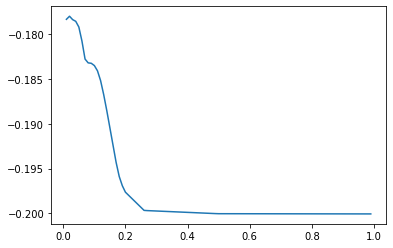

In [13]:
# lasso regression 
lm_l = Lasso(alpha=-0.2)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

In [14]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.08716299477221807

In [20]:
# tune models GridsearchCV 
# takes about 4 minutes to run
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [21]:
print(gs.best_score_)
print(gs.best_estimator_)


-0.08089136793627086
RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=40)


In [22]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))
print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)) #BEST
print(mean_absolute_error(y_test,(tpred_lm*0.2)+(tpred_rf*0.8)))
print(mean_absolute_error(y_test,(tpred_lm*0.1)+(tpred_rf*0.9)))
print(mean_absolute_error(y_test,(tpred_lm*0.05)+(tpred_rf*0.95)))

0.1691213538967064
0.9279899484428603
0.04743589743589744
0.10607343090678938
0.07049331494049442
0.05896460618819594
0.053200251812046684


In [29]:
import pickle
pickl = {'model': gs.best_estimator_} #this contains the model
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )